# Run on midway

To run this notebook, you should log in to the Midway Cluster [via ThinLinc](https://midway2.rcc.uchicago.edu/main/). After you're logged in, run the following lines of code in a terminal window from a login node (to load the Python module we've been working with in the class and then install a couple of additional packages we'll be using):
```
module load python/anaconda-2019.03
pip install --user "dask[complete]" dask-jobqueue dask-ml --upgrade
```
Once you have installed these packages, start up a Jupyter Notebook from the login node (you'll be requesting resources via `dask-jobqueue`'s SLURM functions, on which you will run your code):
```
jupyter notebook
```

-----


In [76]:
from dask_jobqueue import SLURMCluster

# Compose SLURM script
cluster = SLURMCluster(queue='broadwl', cores=10, memory='40GB', 
                       processes=10, walltime='00:15:00', interface='ib0',
                       job_extra=['--account=macs30123']
                      )

# Request resources
cluster.scale(jobs=1)

/home/yilec/.local/lib/python3.7/site-packages/distributed/node.py:164: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 47858 instead
  expected, actual


In [78]:
! squeue -u yilec

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
          11440651   broadwl dask-wor    yilec  R       2:17      1 midway2-0121


In [79]:
from dask.distributed import Client

client = Client(cluster)
client

Client Scheduler: tcp://172.25.220.71:41068 Dashboard: http://172.25.220.71:47858/status,Cluster Workers: 10 Cores: 10 Memory: 37.30 GiB


In [80]:
import dask.dataframe as dd

df = dd.read_csv('/project2/macs30123/AWS_book_reviews/*.csv')

In [81]:
#! pip install --user textblob

import nltk
#nltk.download('all')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [82]:
df['label'] = df['star_rating'].apply(lambda x: 1 if x > 4 else 0, meta=('star_rating', 'int64'))
df['vine_code'] = df['vine'].apply(lambda x:1 if x=='Y' else 0, meta=('vine', 'int64'))
df['verified_purchase_code'] = df['verified_purchase'].apply(lambda x:1 if x=='Y' else 0,
                                                             meta=('verified_purchase', 'int64'))

#def senti(x):
#    return TextBlob(x).sentiment  

#df['senti_score'] = df.review_body.apply(senti)
#df['senti_score'] = df['senti_score'].apply(lambda x: x[0], meta=('senti_score', 'int64'))

#df.review_body = df.review_body.apply(lambda x: word_tokenize(x))
#df['review_len'] = df.review_body.apply(lambda x: len(x), meta=('review_body', 'object'))

In [66]:
df.describe().compute()

,customer_id,product_parent,star_rating,helpful_votes,total_votes,year,label,vine_code,verified_purchase_code
count,2.072616e+07,2.072616e+07,2.072616e+07,2.072616e+07,2.072616e+07,2.072616e+07,2.072616e+07,2.072616e+07,2.072616e+07
mean,3.287233e+07,5.012232e+08,4.340540e+00,3.836475e+00,5.332147e+00,2.010451e+03,6.591733e-01,1.356286e-02,5.109510e-01
std,1.545060e+07,2.878609e+08,1.125604e+00,2.240867e+01,2.581018e+01,4.506381e+00,4.739872e-01,1.156672e-01,4.998801e-01
min,1.002400e+04,5.760000e+02,1.000000e+00,0.000000e+00,0.000000e+00,1.995000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.888019e+07,2.623204e+08,4.000000e+00,0.000000e+00,1.000000e+00,2.010000e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.314521e+07,5.120222e+08,5.000000e+00,1.000000e+00,2.000000e+00,2.013000e+03,1.000000e+00,0.000000e+00,1.000000e+00
75%,5.259045e+07,7.577690e+08,5.000000e+00,7.000000e+00,9.000000e+00,2.014000e+03,1.000000e+00,0.000000e+00,1.000000e+00
max,5.309659e+07,9.999999e+08,5.000000e+00,2.755000e+04,2.872700e+04,2.015000e+03,1.000000e+00,1.000000e+00,1.000000e+00


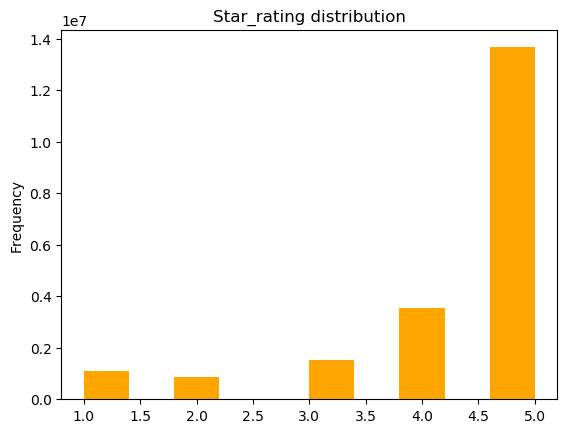

In [10]:
%matplotlib inline
plt.style.use('default')

#Star_rating
df['star_rating'].compute().plot(kind='hist', legend=False, color = 'orange'),
plt.title("Star_rating distribution")
plt.show();

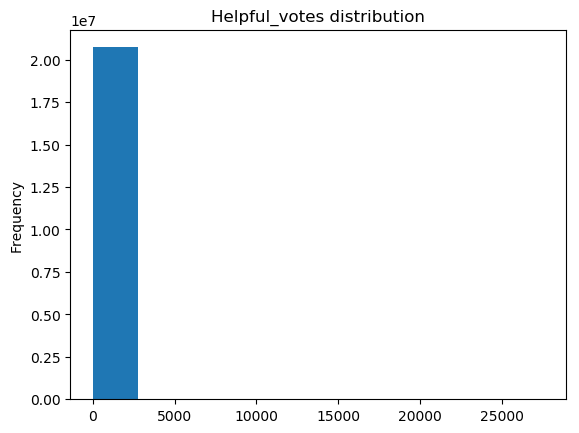

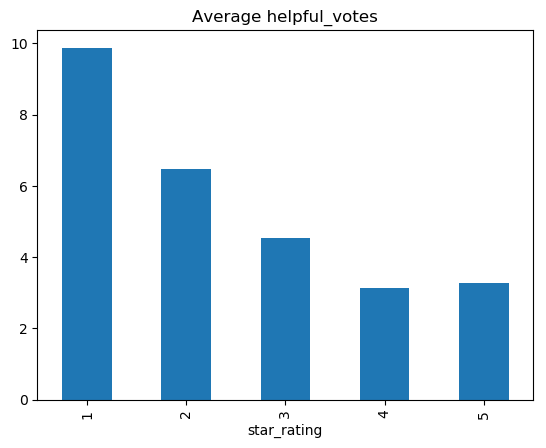

In [71]:
#Helpful_votes
df['helpful_votes'].compute().plot(kind='hist', legend=False)
plt.title("Helpful_votes distribution");

helpful_by_star = (df[['star_rating', 'helpful_votes']].groupby('star_rating')
                                                       .mean())
helpful_df = helpful_by_star.compute() # returns Pandas DataFrame
helpful_df.plot(kind="bar", legend=False)
plt.title('Average helpful_votes');

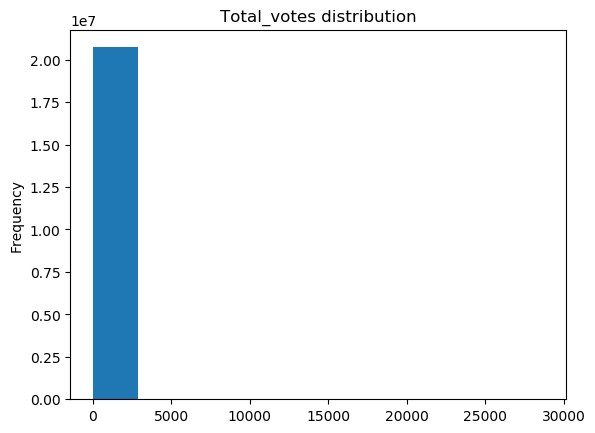

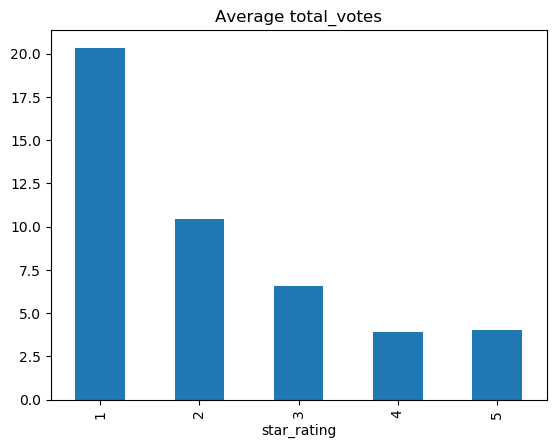

In [30]:
#Total_votes
df[['total_votes']].compute().plot(kind='hist', legend=False),
plt.title("Total_votes distribution");

total_by_star = (df[['star_rating', 'total_votes']].groupby('star_rating')
                                                       .mean())
total_df = total_by_star.compute() # returns Pandas DataFrame
total_df.plot(kind="bar", legend=False)
plt.title('Average total_votes');

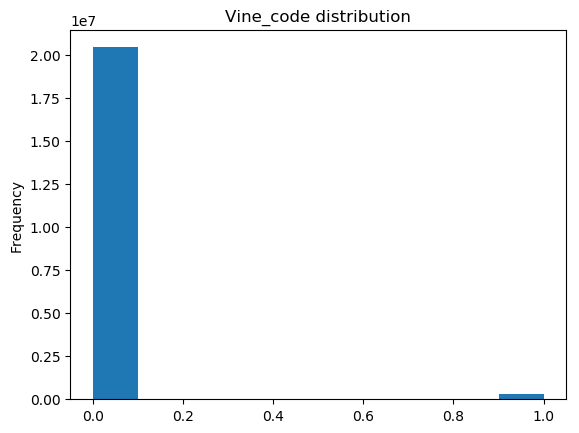

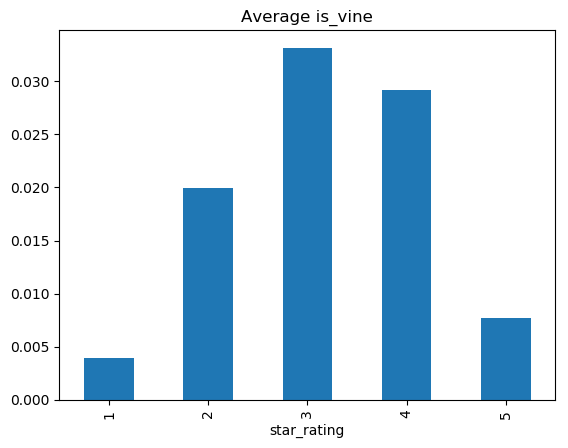

In [15]:
#vine_code

df[['vine_code']].compute().plot(kind='hist', legend=False),
plt.title("Vine_code distribution");

vcode_by_star = (df[['star_rating', 'vine_code']].groupby('star_rating')
                                                       .mean())
vcode_df = vcode_by_star.compute() # returns Pandas DataFrame
vcode_df.plot(kind="bar", legend=False)
plt.title('Average is_vine');

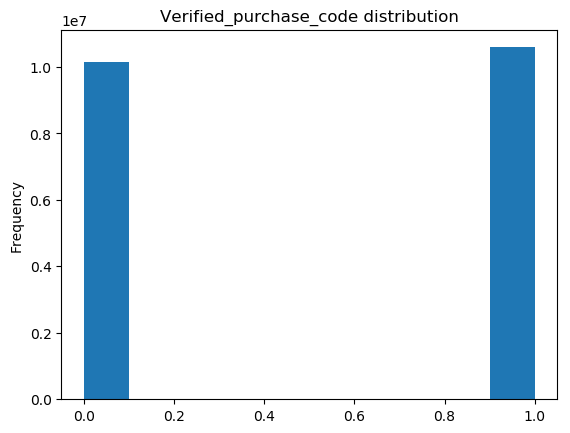

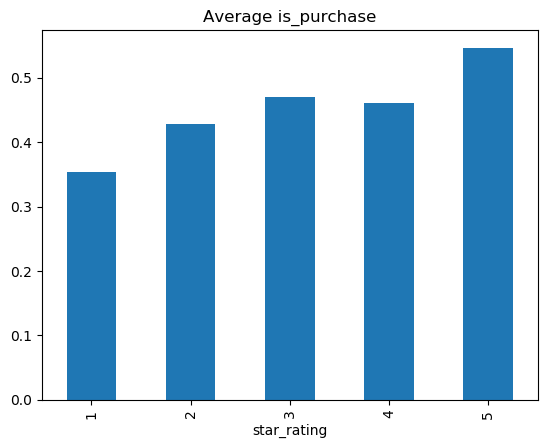

In [31]:
#verified_purchase_code
df[['verified_purchase_code']].compute().plot(kind='hist', legend=False),
plt.title("Verified_purchase_code distribution");

vpur_by_star = (df[['star_rating', 'verified_purchase_code']].groupby('star_rating')
                                                       .mean())
vpur_df = vpur_by_star.compute() # returns Pandas DataFrame
vpur_df.plot(kind="bar", legend=False)
plt.title('Average is_purchase');

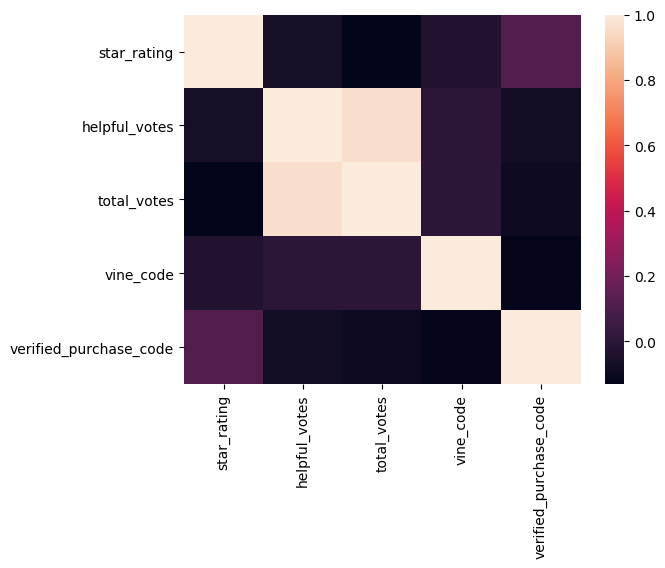

In [32]:
#see heatmap
sns.heatmap(df[['star_rating', 'helpful_votes', 'total_votes', 'vine_code', 'verified_purchase_code']].compute().corr())


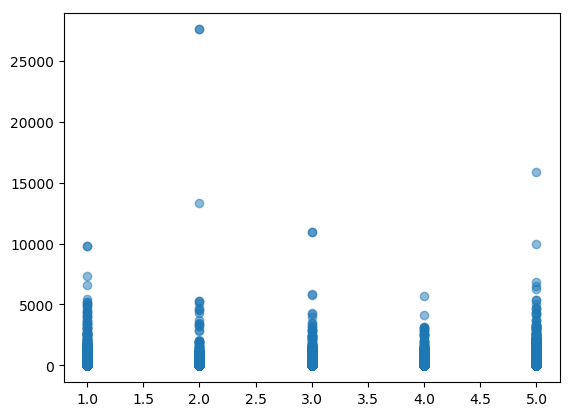

In [33]:
star_df = df['star_rating'].compute()
help_df = df['helpful_votes'].compute()
plt.scatter(star_df, help_df, alpha = 0.5)
plt.title('Scatter plot of star_rating agaist helpful_votes')

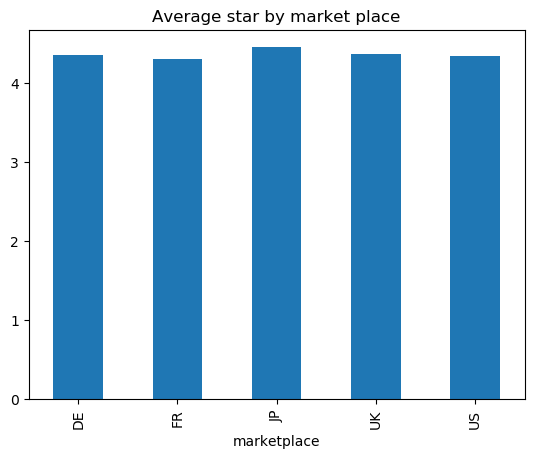

In [72]:
star_by_mkt = (df[['star_rating', 'marketplace']].groupby('marketplace')
                                                       .mean())
mkt_df = star_by_mkt.compute() # returns Pandas DataFrame
mkt_df.plot(kind="bar", legend=False)
plt.title('Average star by market place');

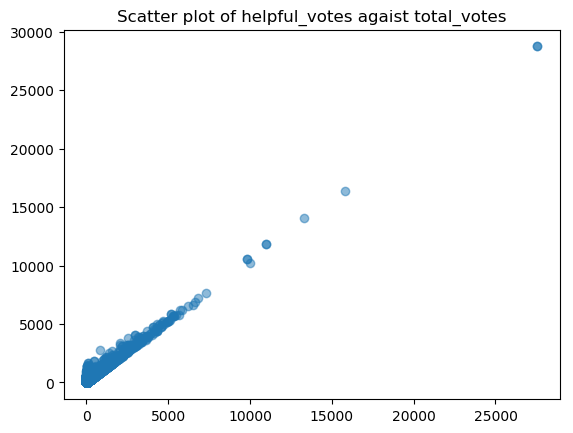

In [83]:
#star_df = df['star_rating'].compute()
help_df = df['helpful_votes'].compute()
tot_df = df['total_votes'].compute()
#plt.scatter(star_df, tot_df, alpha = 0.5)
#plt.title('Scatter plot of star_rating agaist total_votes');
plt.scatter(help_df, tot_df, alpha = 0.5)
plt.title('Scatter plot of helpful_votes agaist total_votes');